# HEART DISEASE PREDICTOR USING MACHINE LEARNING


# Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Dataframe relations

In [11]:
df = pd.read_csv("C:\\Users\\Abhishek\\Downloads\\heart.csv")

In [12]:
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# DATA VISUALIZATION

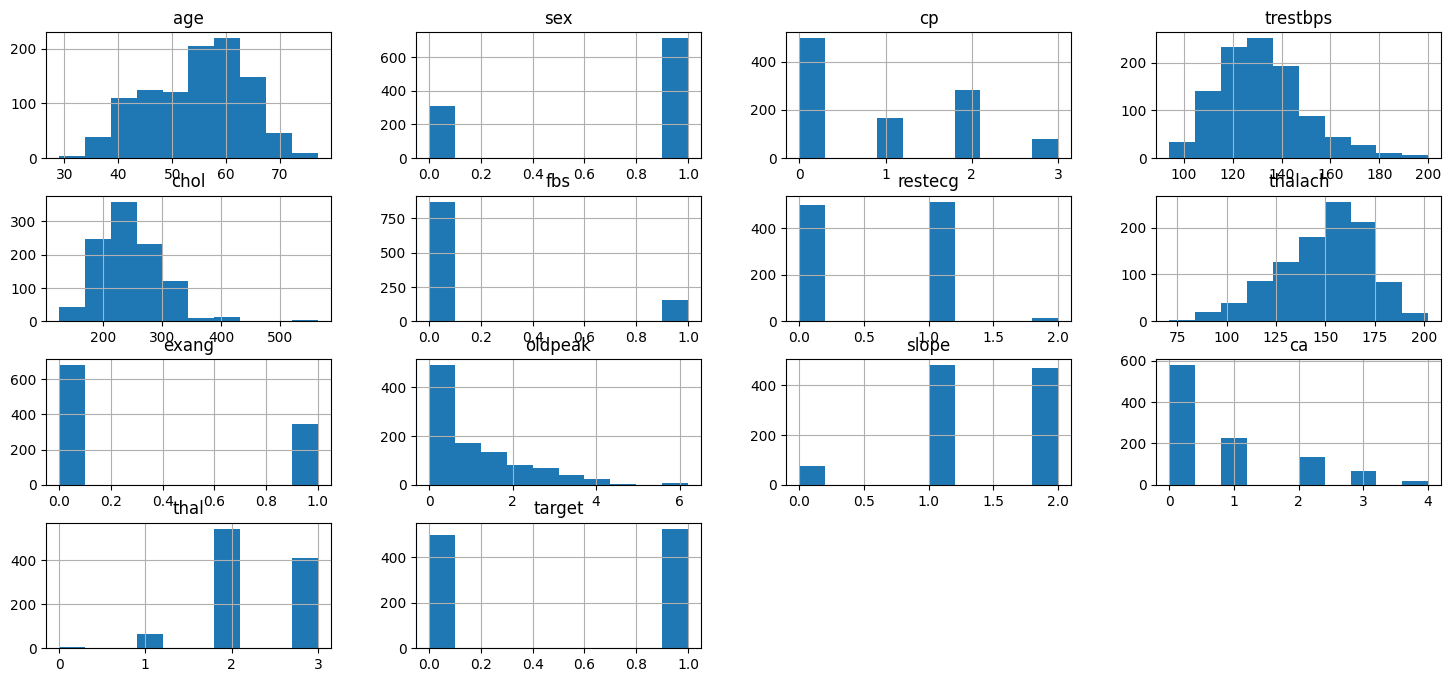

In [17]:
df.hist(figsize=(18,8))
plt.show()

In [18]:
# sns.barplot(df['sex'] , df['age'],hue=df['target'])

<Axes: >

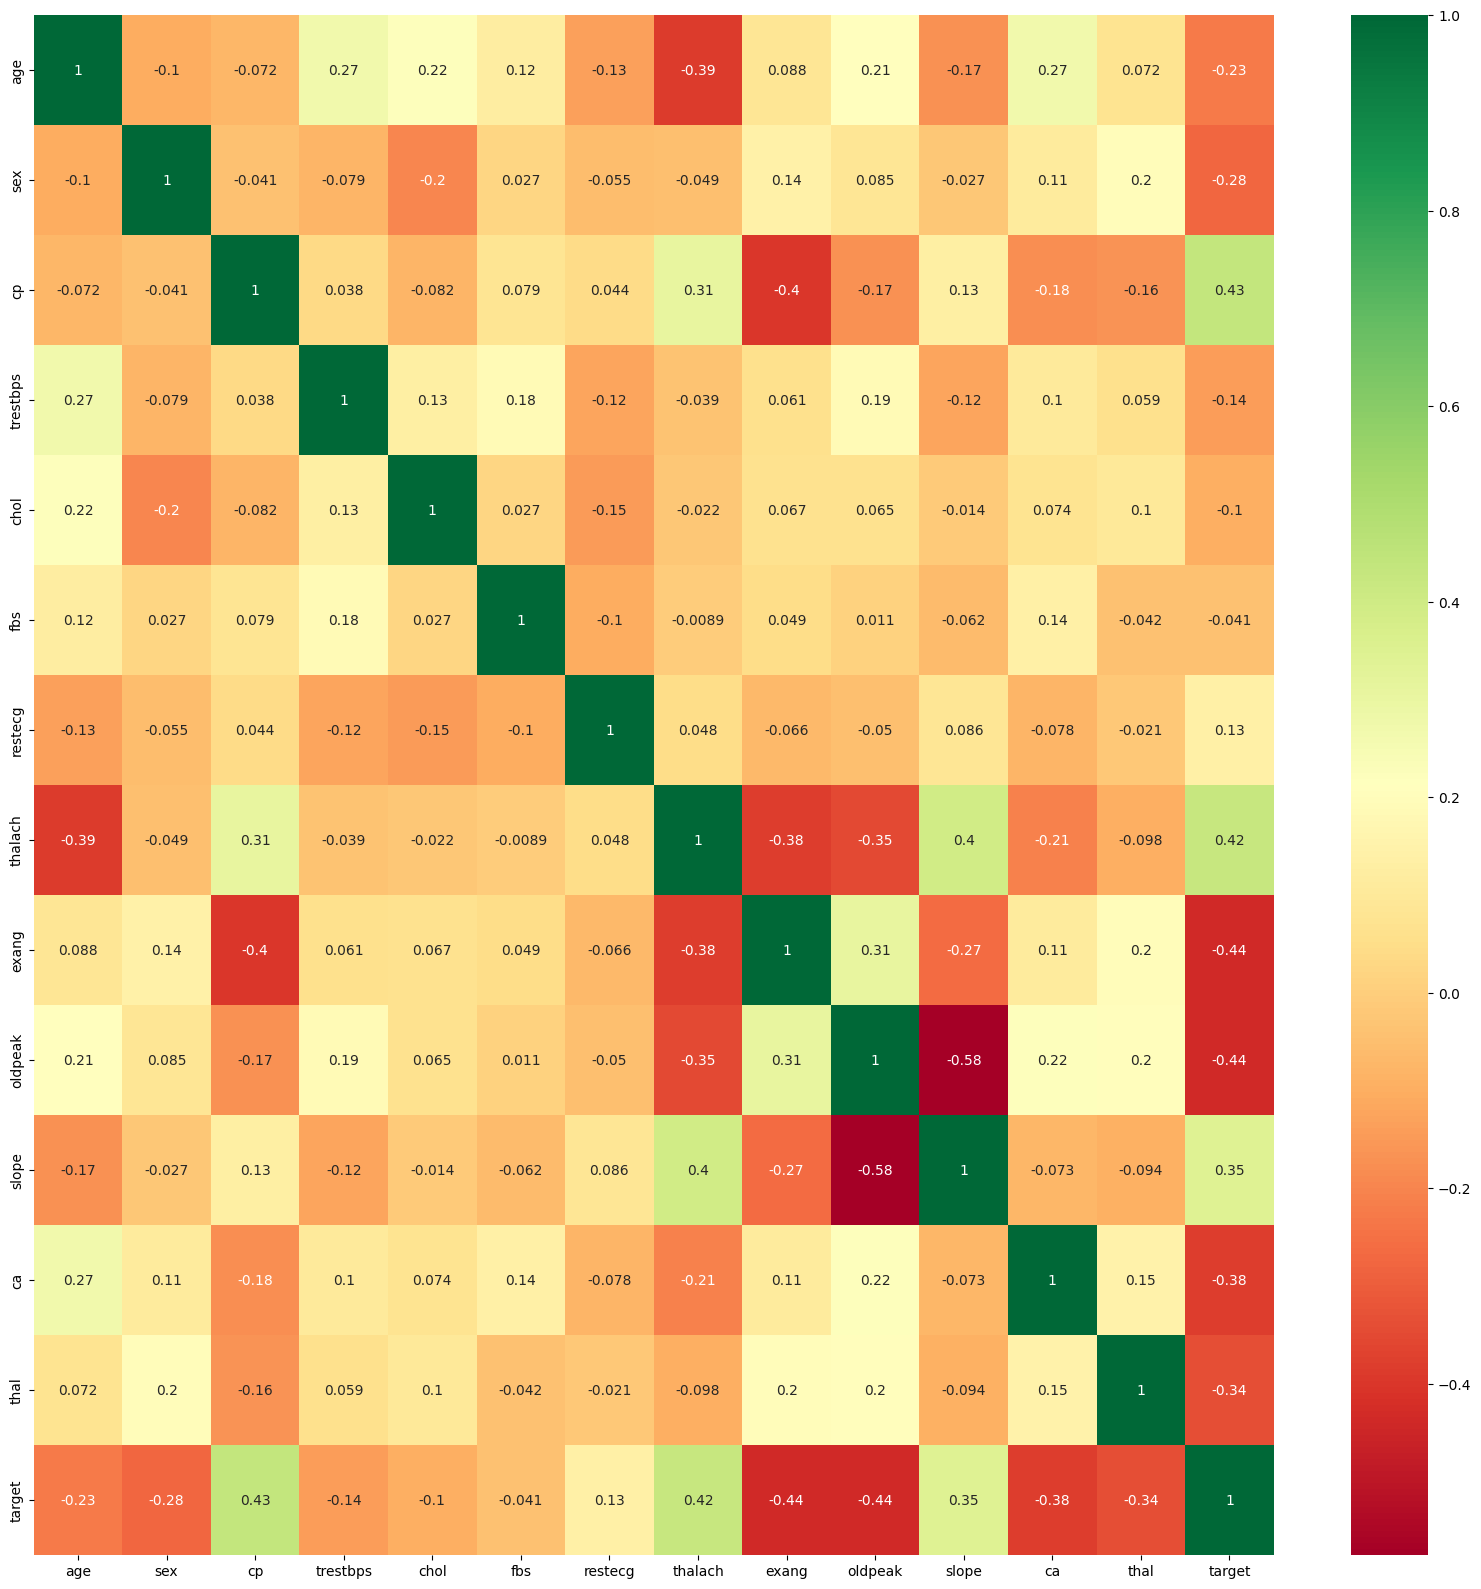

In [19]:
correlation = df.corr()
correlation_format = correlation.index
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True,cmap="RdYlGn")

<Axes: >

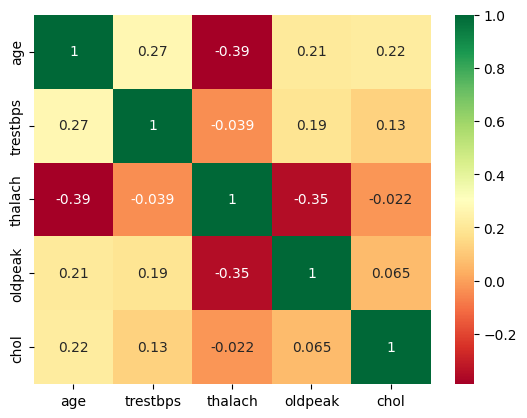

In [20]:
scale_column = ['age','trestbps','thalach','oldpeak','chol']
sns.heatmap(df[scale_column].corr(),annot=True,cmap='RdYlGn')



In [21]:
#correlation.index

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_5808\3657226429.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0].age)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_5808\3657226429.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==1].age)
C:\Users\Abhishe

Text(0.5, 1.0, 'Max Heart Rate of people having Heart Disease')

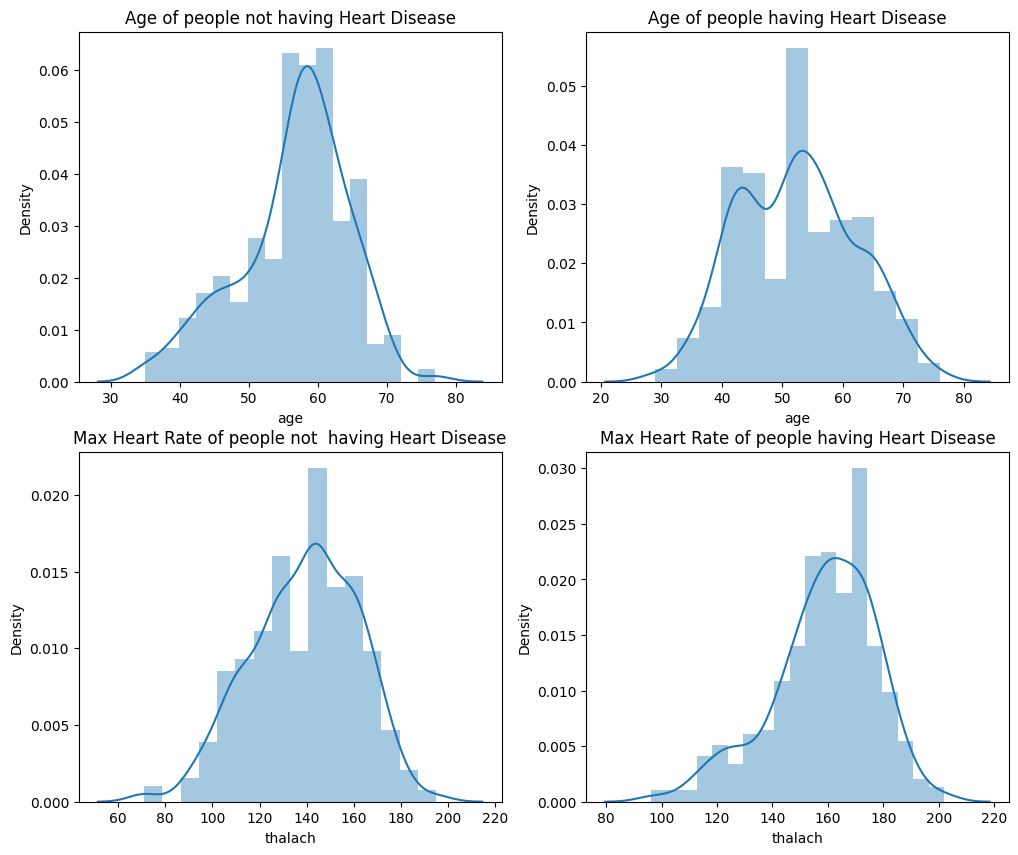

In [22]:
#Distplot 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title("Age of people not having Heart Disease")

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title("Age of people having Heart Disease")

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach,kde=True)
plt.title("Max Heart Rate of people not  having Heart Disease")

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title("Max Heart Rate of people having Heart Disease")

<Axes: xlabel='target', ylabel='count'>

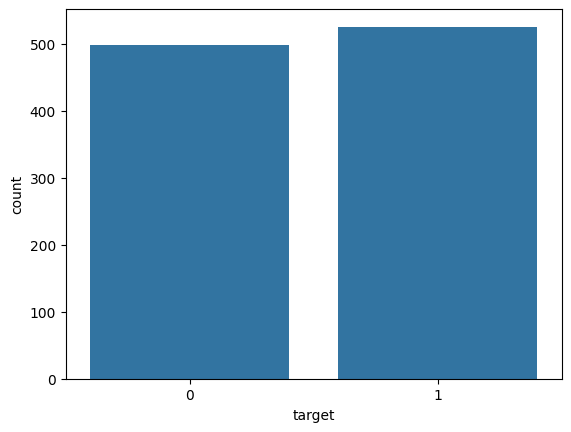

In [23]:
sns.countplot(x='target',data=df)

In [24]:
# df = pd.get_dummies(df,columns=['sex' , 'cp','fbs','restecg','exang','slope','ca','thal'])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])



# Data Preprocessing

In [26]:

X = df.drop(['target'],axis=1)
y= df['target']

In [27]:
X.drop(['slope','ca','oldpeak'],axis=1,inplace=True)

In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [29]:
X.shape , y.shape

((1025, 10), (1025,))

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=5)

In [31]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,thal
390,0.393241,0,1,0.250643,1.415625,1,0,0.125502,0,2
864,0.503520,1,3,1.621431,0.523587,0,0,-1.048692,0,2
489,0.724079,1,2,1.050269,-0.058176,1,1,-0.526828,1,2
165,0.503520,1,0,2.192593,1.551370,0,0,-0.396362,1,3
40,1.165198,0,2,1.621431,2.210702,0,0,0.082013,0,2
...,...,...,...,...,...,...,...,...,...,...
998,-1.371232,1,0,0.250643,1.338056,0,1,-1.048692,1,1
701,-2.143189,1,0,-0.663216,-0.930822,0,1,-0.831249,1,3
1007,0.172682,1,3,-0.663216,-1.027782,0,0,0.560389,0,3
206,0.503520,1,2,-0.320519,-0.542979,1,1,-0.657294,0,1


In [32]:
X_train.shape

(820, 10)

In [33]:
y_train

390     0
864     0
489     1
165     0
40      1
       ..
998     0
701     0
1007    1
206     0
867     1
Name: target, Length: 820, dtype: int64

In [34]:
y_train.shape

(820,)

In [35]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,thal
293,0.503520,1,2,1.050269,-0.659332,1,1,0.342945,0,2
697,1.385757,1,2,1.164502,-0.659332,0,0,0.038525,0,3
353,0.282961,1,0,-1.234378,-0.872645,0,1,-1.005203,1,1
481,0.944639,0,0,1.050269,3.122131,0,0,0.212479,0,3
823,-0.047877,1,0,0.479107,-0.135745,0,1,0.473411,0,2
...,...,...,...,...,...,...,...,...,...,...
384,-2.143189,1,0,-0.320519,0.698116,0,0,0.299457,1,3
928,-0.047877,1,0,-0.434752,0.387842,0,0,-1.744511,1,3
737,1.385757,1,0,-0.663216,-0.329666,0,0,-0.874737,1,3
505,-1.150673,0,2,-0.777449,-0.077568,0,1,-0.004964,0,2


In [36]:
y_test

293    1
697    0
353    1
481    0
823    1
      ..
384    0
928    0
737    0
505    1
875    0
Name: target, Length: 205, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MODEL DESIGN USING ML ALGORITHM

In [38]:
##Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model= RandomForestClassifier(n_estimators=10)

In [41]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X,y,cv=10)

In [42]:
score.mean()

0.9902436702836475

In [43]:
model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
model.score(X_test , y_test)

1.0

In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_model1 = accuracy_score(y_test , y_pred)
accuracy_model1

1.0

In [47]:
# def model_feature_importance(model):
#     plt.figure(figsize=(12,10))
#     n_features=10
#     plt.barh(range(n_features),model.feature_importances_,align='center')
#     plt.yticks(np.arange(n_features),X)
#     plt.xlabel("Feature Importance")
#     plt.ylabel("Features")
    
# model_feature_importance(model)   

In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)
accuarcy_lr=accuracy_score(y_test, y_pred_lr)
print(accuarcy_lr)

0.7902439024390244


In [49]:
# # Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
# dt_classifier.fit(X_train, y_train)
# y_pred_dt = dt_classifier.predict(X_test)
# accuarcy_dt=accuracy_score(y_test, y_pred_dt)
# print(accuarcy_dt)

In [65]:
import pickle
# open a file, where you ant to store the data
file = open('heart_disease_predictor_project_rf6.pkl', 'wb')

# dump information to that file
pickle.dump(model,file)

In [68]:
data = open('heart_disease_predictor_project_rf6.pkl','rb')
forest = pickle.load(data)

EOFError: Ran out of input

In [55]:
y_prediction = forest.predict(X_test)

In [56]:
y_prediction 

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [57]:
X_test

array([[ 0.5040909 ,  0.65465367,  1.06670334, ...,  0.34709606,
        -0.72203588, -0.52279212],
       [ 1.37316745,  0.65465367,  1.06670334, ...,  0.03618292,
        -0.72203588,  1.08882268],
       [ 0.28682176,  0.65465367, -0.89670123, ..., -1.02980498,
         1.38497273, -2.13440692],
       ...,
       [ 1.37316745,  0.65465367, -0.89670123, ..., -0.89655649,
         1.38497273,  1.08882268],
       [-1.12542764, -1.52752523,  1.06670334, ..., -0.00823324,
        -0.72203588, -0.52279212],
       [ 0.61272547,  0.65465367, -0.89670123, ..., -0.76330801,
         1.38497273,  1.08882268]])

In [59]:
arr = np.array([[57,0,0,140,241,0,1,123,1,3]])
prediction=lr_classifier.predict(arr)

In [60]:
prediction

array([0], dtype=int64)

In [61]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1
